In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from wordcloud import WordCloud
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
from wordcloud import WordCloud

import warnings 
warnings.filterwarnings("ignore")

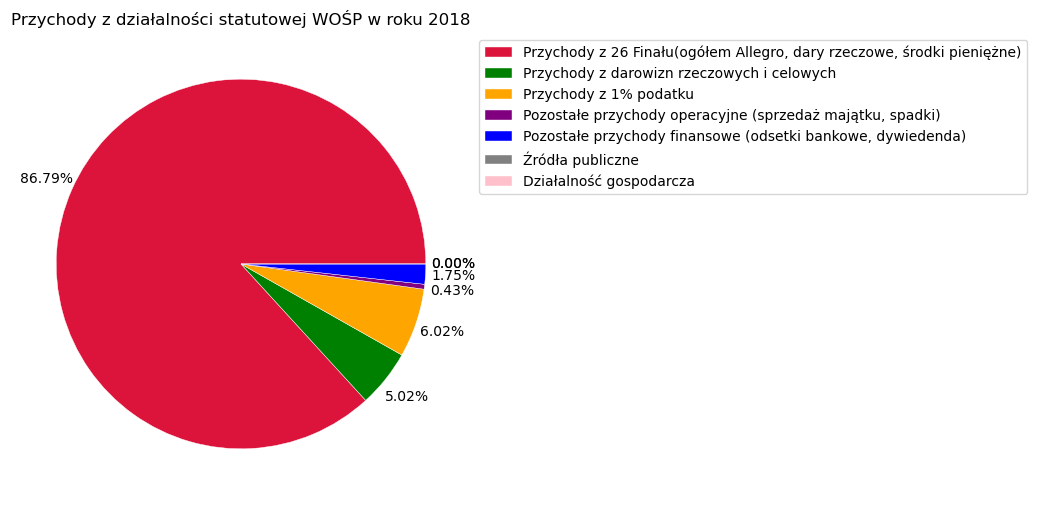

In [5]:
# Slajd z jakich źródeł pochodzą pieniądze
# rok 2018
# źródło: Informacja dodatkowa - rok 2018 
przychody_etykiety =["Przychody z 26 Finału(ogółem Allegro, dary rzeczowe, środki pieniężne)", "Przychody z darowizn rzeczowych i celowych", "Przychody z 1% podatku", "Pozostałe przychody operacyjne (sprzedaż majątku, spadki)", "Pozostałe przychody finansowe (odsetki bankowe, dywiedenda)", "Źródła publiczne", "Działalność gospodarcza"]
przychody = [126393416.82,  7305664.21,  8764075.23,  619252.07, 2554342.67, 0, 0]
df = pd.DataFrame(przychody, ["" for i in range(len(przychody))])


fig, axes = plt.subplots(figsize=(8,6))
df.plot.pie(subplots=True, ax=axes, autopct = '%1.2f%%', pctdistance = 1.15, legend=False, ylabel='', wedgeprops=dict(linewidth=0.3, edgecolor='white'), colors=['crimson', 'green', 'orange', 'purple', 'blue', 'grey', 'pink'])
plt.legend(przychody_etykiety, bbox_to_anchor=(1, 1))
plt.title("Przychody z działalności statutowej WOŚP w roku 2018")
plt.savefig("Przychody z działalności statutowej WOŚP w roku 2018.png", bbox_inches='tight', transparent=True)

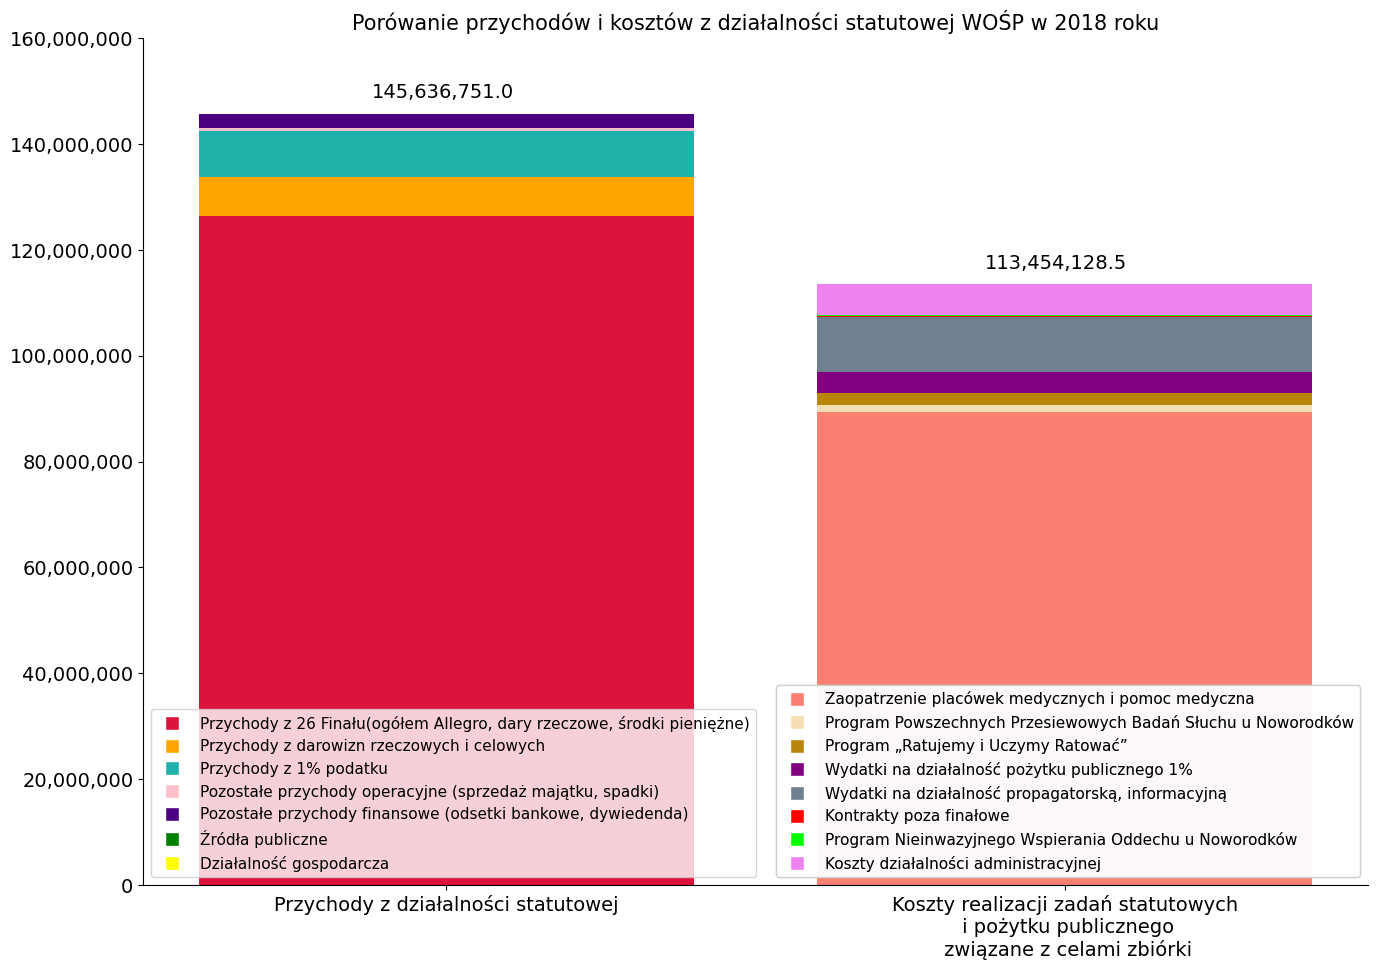

In [6]:
# Slajd z porównaniem ile ogólnie zebrali a ile wydali na cele zbiórki więc będzie widać różnicę 
# źródło: Informacja dodatkowa - rok 2018 

przychody_suma = sum(przychody)
koszty = [89321329.81, 1413260.41, 2168257.01,  4010319.30, 10467810.67, 202969.14, 22860.00, 5847322.16]
koszty_suma = sum(koszty)
etykiety_kolumn = ["Przychody z działalności statutowej", "Koszty realizacji zadań statutowych\n i pożytku publicznego\n związane z celami zbiórki"]
wartosci = [przychody_suma, koszty_suma]

# dodaje jedno 0 zeby dlugosci listy przychody i listy koszty byly takie same 
przychody.append(0)

# lista z listami odpowiadających sobie par 
# [[przchody[0], koszty[0]], [przychody[1], koszty[1]],...]
pary = [[przychody[i], koszty[i]] for i in range(8)]

koszty_etykiety = ["Zaopatrzenie placówek medycznych i pomoc medyczna", "Program Powszechnych Przesiewowych Badań Słuchu u Noworodków", "Program „Ratujemy i Uczymy Ratować”", "Wydatki na działalność pożytku publicznego 1%", "Wydatki na działalność propagatorską, informacyjną", "Kontrakty poza finałowe", "Program Nieinwazyjnego Wspierania Oddechu u Noworodków", "Koszty działalności administracyjnej"]


fig, axes = plt.subplots(figsize=(15.8,11))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))
# ustawiam formatowanie wartości na osi y poprez metodę .yaxis.set_major_formatter
# która jako argument przyjmuje obiekt klasy formatter
# zaimportowałam FuncFormatter który jest obiektem typu formatter
# FuncFormatter pozwala na zdefiniowanie funkcji do formatowania etykiet
# struktura funkcji FuncFormatter jest taka: FuncFormatter(func, **kwargs),
# przy czym func musi być funkcją przyjmującą dwie wartości, 
# dlatego używam lambdy (funkcji anonimowej) o wartości x, której używam 
# i wartości pustej oznaczanej zwyczajowo jako _ 

plt.title("Porówanie przychodów i kosztów z działalności statutowej WOŚP w 2018 roku", fontsize=15)
plt.ylim(0,160000000)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)


kolory = [['crimson', 'salmon'], ['orange', 'wheat'], ['lightseagreen', 'darkgoldenrod'], ['pink', 'purple'], ['indigo', 'slategray'], ['green', 'red'], ['yellow', 'lime'], ['saddlebrown', 'violet']]

# Parametr bottom określa, od której wartości mają się zaczynać kolejne kolumny
bottom = [0] * len(etykiety_kolumn)

for i in range(len(pary)):
    plt.bar(etykiety_kolumn, pary[i], bottom=bottom, color=kolory[i])
    bottom = [b + p for b, p in zip(bottom, pary[i])]


    
# tworzę legendę ręcznie 
kolory1 = [podlista[0] for podlista in kolory]
legend_patches1 = [Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in kolory1]
legenda1 = plt.legend(legend_patches1, przychody_etykiety, loc = 'lower left', fontsize=11)

kolory2 = [podlista[1] for podlista in kolory]
legend_patches2 = [Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in kolory2]
legenda2 = plt.legend(legend_patches2, koszty_etykiety, loc = 'lower right', fontsize=11)


# dodanie legendy do wykresu 
plt.gca().add_artist(legenda1)
plt.gca().add_artist(legenda2)

# usuwam ramkę z prawej strony i na górze
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')

# format(liczba, ',') powoduje dodanie przecików do liczby jako seperatora tysięcy
plt.text(-0.12, przychody_suma+3000000, format(round(przychody_suma,2),','), fontsize=14)
plt.text(0.87, koszty_suma+3000000, format(round(koszty_suma,2),','), fontsize=14)

plt.savefig("Porówanie przychodów i kosztów z działalności statutowej WOŚP w 2018 roku.png", bbox_inches='tight', transparent=True)
plt.show()

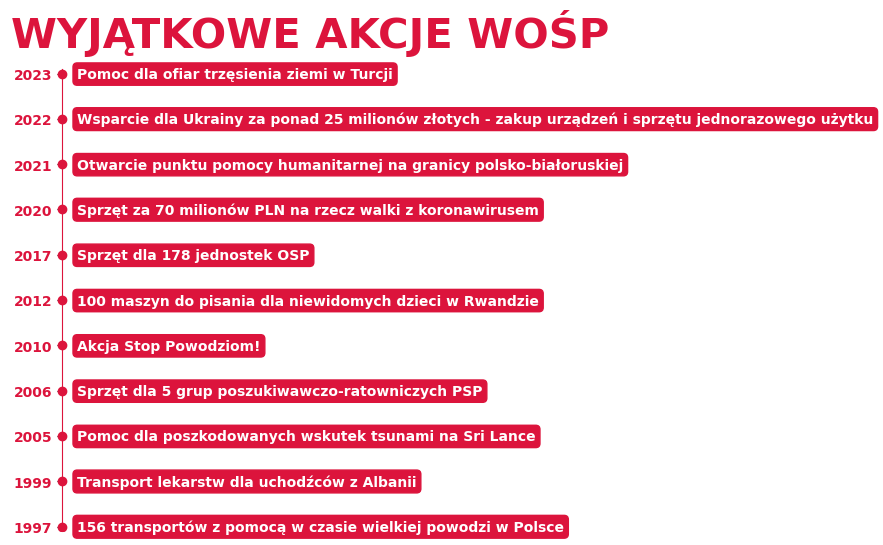

In [7]:
fig, axes = plt.subplots(figsize=(8,6))
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.spines['bottom'].set_color('none')
axes.spines['left'].set_color('crimson')
axes.spines['left'].set_position(('data', 0))
etykiety_y = [1997, 1999, 2005, 2006, 2010, 2012, 2017, 2020, 2021, 2022, 2023]
plt.ylim(-0.1,10.1)
plt.xlim(-1,11)
plt.yticks(np.arange(0,11), etykiety_y, color='crimson', fontweight='bold')
plt.xticks([])
axes.scatter([0]*len(etykiety_y), np.arange(0,11), color='crimson', zorder=2)

akcje = ["156 transportów z pomocą w czasie wielkiej powodzi w Polsce", "Transport lekarstw dla uchodźców z Albanii", "Pomoc dla poszkodowanych wskutek tsunami na Sri Lance", "Sprzęt dla 5 grup poszukiwawczo-ratowniczych PSP", "Akcja Stop Powodziom!", "100 maszyn do pisania dla niewidomych dzieci w Rwandzie", "Sprzęt dla 178 jednostek OSP", "Sprzęt za 70 milionów PLN na rzecz walki z koronawirusem", "Otwarcie punktu pomocy humanitarnej na granicy polsko-białoruskiej", "Wsparcie dla Ukrainy za ponad 25 milionów złotych - zakup urządzeń i sprzętu jednorazowego użytku", "Pomoc dla ofiar trzęsienia ziemi w Turcji"]

for i in range(len(akcje)):
    plt.text(0.3, -0.1+i, akcje[i], color='white', fontweight='bold', bbox=dict(facecolor='crimson', edgecolor='crimson', boxstyle='round'))

plt.suptitle("WYJĄTKOWE AKCJE WOŚP", color='crimson', fontweight='bold', fontsize=30)

plt.savefig("Wyjątkowe akcje wośp.png", transparent=True)
plt.show()

In [8]:
#pip install wordcloud

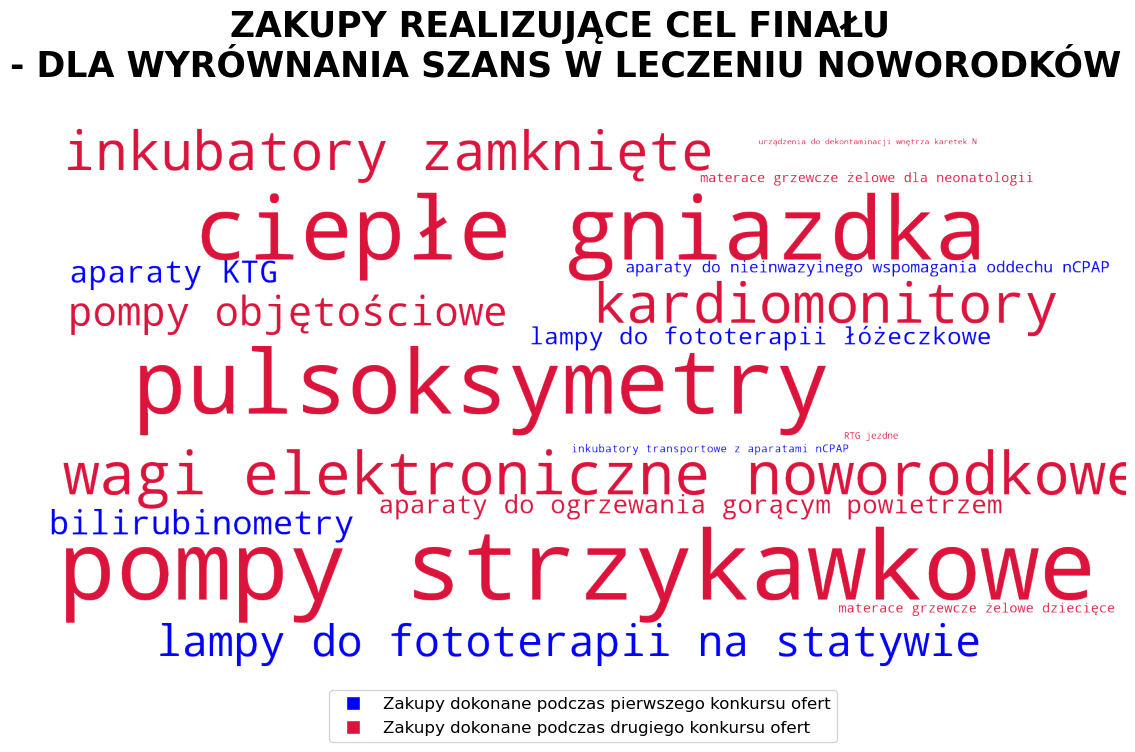

In [9]:
przedmioty1 = ('inkubatory transportowe z aparatami nCPAP', 'aparaty do nieinwazyinego wspomagania oddechu nCPAP',
              'lampy do fototerapii łóżeczkowe', 'aparaty KTG', 'bilirubinometry', 'lampy do fototerapii na statywie')

ilosc1 = (23, 64, 69, 118, 139, 246)

przedmioty2 = ('urządzenia do dekontaminacji wnętrza karetek N',
               'RTG jezdne', 'materace grzewcze żelowe dziecięce', 'materace grzewcze żelowe dla neonatologii',
               'aparaty do ogrzewania gorącym powietrzem', 'pompy objętościowe', 'inkubatory zamknięte', 'kardiomonitory',
               'wagi elektroniczne noworodkowe', 'ciepłe gniazdka', 'pulsoksymetry',
               'pompy strzykawkowe')

ilosc2 = (17, 20, 44, 47, 80, 209, 284, 299, 343, 421, 438, 508)

# Połączenie obu list i ilości
przedmioty = przedmioty1 + przedmioty2
ilosci = ilosc1 + ilosc2

# Funkcja do generowania chmury słów z różnymi kolorami dla dwóch zestawów
def generowanie_chmury(dane, kolory):
    plt.figure(figsize=(14, 8))
    # używam parametru color_func aby dostosować kolor do każdego słowa, pobieram kolor z przygotowanego słownika
    # przekazuję do funkcji **kwargs, to oznaczenie pozwala przekazać do funkcji dowolną ilość el nazwanych 
    # musimy to zrobić, bo w sygnaturze funkcji color_func są inne argumenty, których my nie mamy potrzeby przekazywać 
    # sygnatura color_func: def color_func(word, font_size, position, orientation, random_state=None, font_path=None):
    
    # dzęki ustawieniu parametru scale na 2 renderuje słowa w lepszej rozdzielczości 
    # 255,255,255 oznacza w systemie rgb kolor biały, w systemie rgba ostatni kanał to kanał alpha ustawiający przezroczystość 
    # dlatego na końcu dodaję 0 
    # ustawiam parametr mode na "RGBA", ponieważ z niego korzystam
    wc = WordCloud(width=800, height=400, prefer_horizontal=1,scale=2, background_color='rgba(255, 255, 255, 0)', mode="RGBA", color_func=lambda nazwa, **kwargs: kolory.get(nazwa))
    wc.generate_from_frequencies(dane)
    
    # wyświetlanie chmury 
    plt.imshow(wc)
    # usuwanie obramowań 
    plt.axis('off')
    # dodaję ręcznie legendę 
    kolory_leg = ['blue', 'crimson']
    etykiety_chmura = ["Zakupy dokonane podczas pierwszego konkursu ofert", "Zakupy dokonane podczas drugiego konkursu ofert"]
    legend_patches = [Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in kolory_leg]
    legenda = plt.legend(legend_patches, etykiety_chmura, loc = 'lower center', bbox_to_anchor=(0.5, -0.15), fontsize=12)
    
    plt.suptitle("ZAKUPY REALIZUJĄCE CEL FINAŁU \n- DLA WYRÓWNANIA SZANS W LECZENIU NOWORODKÓW", fontweight='bold', fontsize=25, color='black')
    plt.savefig("chmura słów.png", transparent=True)
    plt.show()

# Przygotowanie danych do chmury słów
ilosci_dict = dict(zip(przedmioty, ilosci))

# Ustalamy kolory dla przedmiotów1 i przedmiotów2
kolory_dict = {przedmiot: 'blue' for przedmiot in przedmioty1}
kolory_dict.update({przedmiot: 'crimson' for przedmiot in przedmioty2})

# Generowanie chmury słów
generowanie_chmury(ilosci_dict, kolory_dict)
